In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **Descriptive Statistics**


In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
fare = np.array(df.fare) # df i np ye dönüştürdük.

In [5]:
len(fare)

891

In [6]:
np.mean(fare)

32.204207968574636

In [7]:
np.median(fare)

14.4542

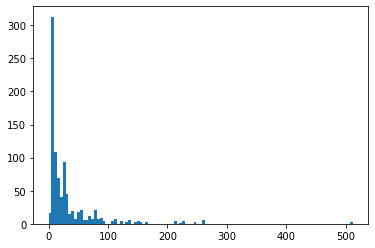

In [8]:
plt.hist(fare, bins= "auto"); # mean kuyruğa yakın sağa çarpık.

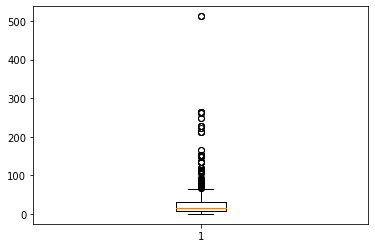

In [9]:
plt.boxplot(fare); # ouitlier fazla.

In [10]:
boolarr = fare < 200 # 200 den küçük olan ücretleri daha yakından ele alacağız.

In [11]:
newfare = fare[boolarr] # fare[boolarr] = fare[fare < 200]

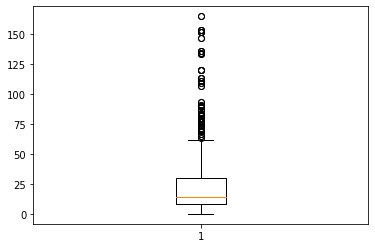

In [12]:
plt.boxplot(newfare); 

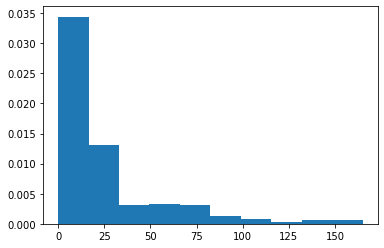

In [13]:
plt.hist(newfare, density=True ); # yoğunluklarına baktık.

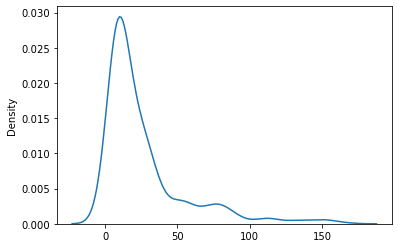

In [14]:
sns.kdeplot(newfare); # dağılıma daha düz çizgiyle baktık.

In [15]:
stats.skew(newfare) # çarpıklığını hesaplıyoruz

2.2471201602453075

In [16]:
stats.mode(newfare)

ModeResult(mode=array([8.05]), count=array([43]))

In [17]:
np.var(newfare)

860.5028943449321

In [18]:
np.std(newfare)

29.33432962153613

In [19]:
np.percentile(newfare, 50) == np.median(newfare)

True

In [20]:
np.percentile(newfare, 50)

13.8625

In [21]:
np.percentile(newfare, 25)

7.8958

In [22]:
np.percentile(newfare, 75)

30.0

In [23]:
iqr = np.percentile(newfare, 75) - np.percentile(newfare, 25)
iqr

22.1042

In [24]:
stats.iqr(newfare)

22.1042

In [25]:
stats.describe(newfare)

DescribeResult(nobs=871, minmax=(0.0, 164.8667), mean=26.53017037887486, variance=861.4919781315355, skewness=2.2471201602453075, kurtosis=5.266968870155699)

# **Scatter Plot**

In [26]:
tv_hours = [3,5,2,0,5,3,1,4,3,4] # öğrencilerin TV izleme süreleri
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6] # not ortalaması

In [27]:
tv_hours = np.array(tv_hours)
GPA = np.array(GPA)
# Aritmetik işlemleri kolaylıkla yapmak için array içerisine attık.

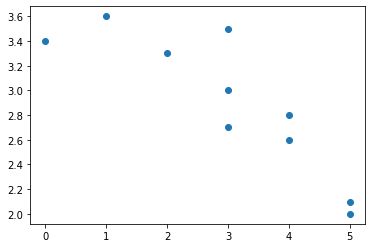

In [28]:
plt.scatter(tv_hours, GPA);
# İki veriyi karşılaştırmak için scatterplot kullandık ve noktalar linner bir doğru etrafında toplanmış demekki iki veri arasında güçlü ve negatif bir ilişki var. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


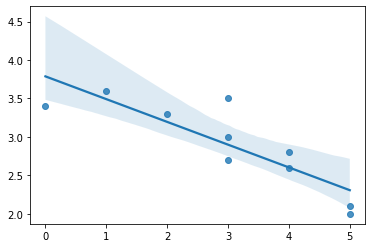

In [29]:
sns.regplot(tv_hours, GPA); # Lineer doğruyu daha net görmüş olduk.

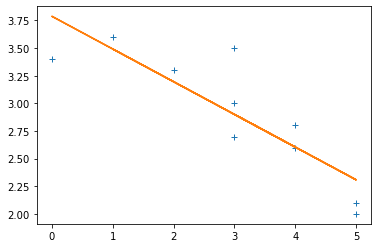

In [30]:
m , b = np.polyfit(tv_hours, GPA, 1) # Least squares polynomial fit.
plt.plot(tv_hours, GPA, "+")
plt.plot(tv_hours, m*tv_hours + b); # en uygun reg. çizgisini çizer.


# Manuel (with Formula)

In [31]:
tv_hours = [3,5,2,0,5,3,1,4,3,4]
GPA = [2.7,2.1,3.3,3.4,2.0,3.0,3.6,2.8,3.5,2.6]

In [32]:
# Convert the lists to Numpy arrays
x = np.array(tv_hours)
y = np.array(GPA)

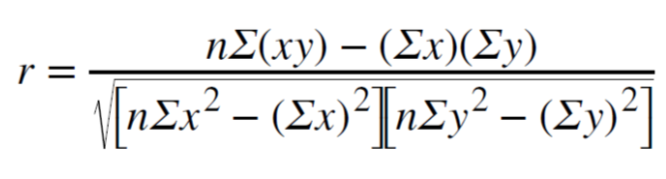

In [33]:
# Pearson Korelasyon Formülünü kullanın. Önce payı hesaplayın, sonra paydayı hesaplayın, ardından r katsayısını hesaplayın.

In [34]:
numer = len(x)*sum(x*y) - sum(x)*sum(y)
numer

-71.00000000000011

In [35]:
denom = np.sqrt((len(x)*sum(x**2)-sum(x)**2)*(len(y)*sum(y**2)-sum(y)**2))
denom

82.84926070883178

In [36]:
r = numer/denom
r
# negatif güçlü ilişki var.

-0.8569780755138527

# Scipy

In [37]:
r, p = stats.pearsonr(tv_hours, GPA)  # pearson correlation katsayısını ve p-value verir.
r

-0.8569780755138501

In [38]:
stats.pearsonr(tv_hours, GPA) # pearsonr kullanabilmemmiz için iki değişkenin normal dağılım old. varsayarız.

(-0.8569780755138501, 0.001534743626999713)

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed.

In [39]:
stats.spearmanr(GPA, tv_hours) # normal dağılım varsaymadıgımız durumlarda kullanabiliriz.

SpearmanrResult(correlation=-0.8643457510060755, pvalue=0.001253729937570454)

Calculate Kendall’s tau, a correlation measure for ordinal data.

Kendall’s tau is a measure of the correspondence between two rankings.

In [40]:
stats.kendalltau(tv_hours, GPA) # ordinal veriler için kullanıslı.

KendalltauResult(correlation=-0.7542472332656507, pvalue=0.0033968772424454747)

## Numpy

In [41]:
np.cov(GPA, tv_hours)
# kovaryans da işaretten yönden bahseder. burda güç kavramı eksik. x y arasndakı cov -0.78888889

array([[ 0.31777778, -0.78888889],
       [-0.78888889,  2.66666667]])

Calculate the sample variances

In [42]:
stats.tvar(GPA)

0.3177777777777777

In [43]:
stats.tvar(tv_hours)

2.6666666666666665

Calculate the correlation coefficients with Numpy

In [44]:
np.corrcoef(tv_hours, GPA) # satır sütun tv gpa düşün.

array([[ 1.        , -0.85697808],
       [-0.85697808,  1.        ]])

## Pandas

In [45]:
df = sns.load_dataset("car_crashes")

In [46]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [48]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


Create the correlation matrix with Pandas

In [49]:
df.corr()
# Burada python default olarak pearson yöntemini kullanıyor.

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [50]:
df.corr().loc["total","no_previous"]

0.9561791745723077

In [51]:
df.total.corr(df.speeding)

0.6115476008001183

Spearman correlation matrix with Pandas

In [52]:
df.corr("spearman")

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.559365,0.894576,0.877605,0.958206,-0.118070,-0.000045
speeding,0.559365,1.000000,0.642654,0.562876,0.541699,-0.052128,-0.065341
alcohol,0.894576,0.642654,1.000000,0.796959,0.856012,-0.122899,0.020679
not_distracted,0.877605,0.562876,0.796959,1.000000,0.798136,-0.112853,0.015340
no_previous,0.958206,0.541699,0.856012,0.798136,1.000000,-0.036969,0.003937
ins_premium,-0.118070,-0.052128,-0.122899,-0.112853,-0.036969,1.000000,0.646697
ins_losses,-0.000045,-0.065341,0.020679,0.015340,0.003937,0.646697,1.000000


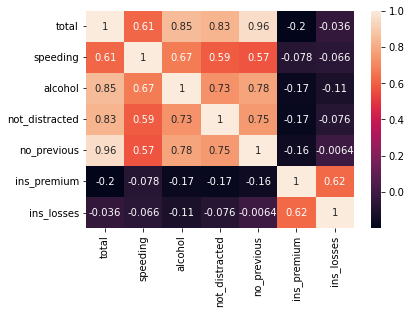

In [53]:
sns.heatmap(df.corr(),annot=True );
# Heatmap ile koelasyon matrisini görsel olarak görüyoruz ve burada acık renkler kuvvetli koreledir.

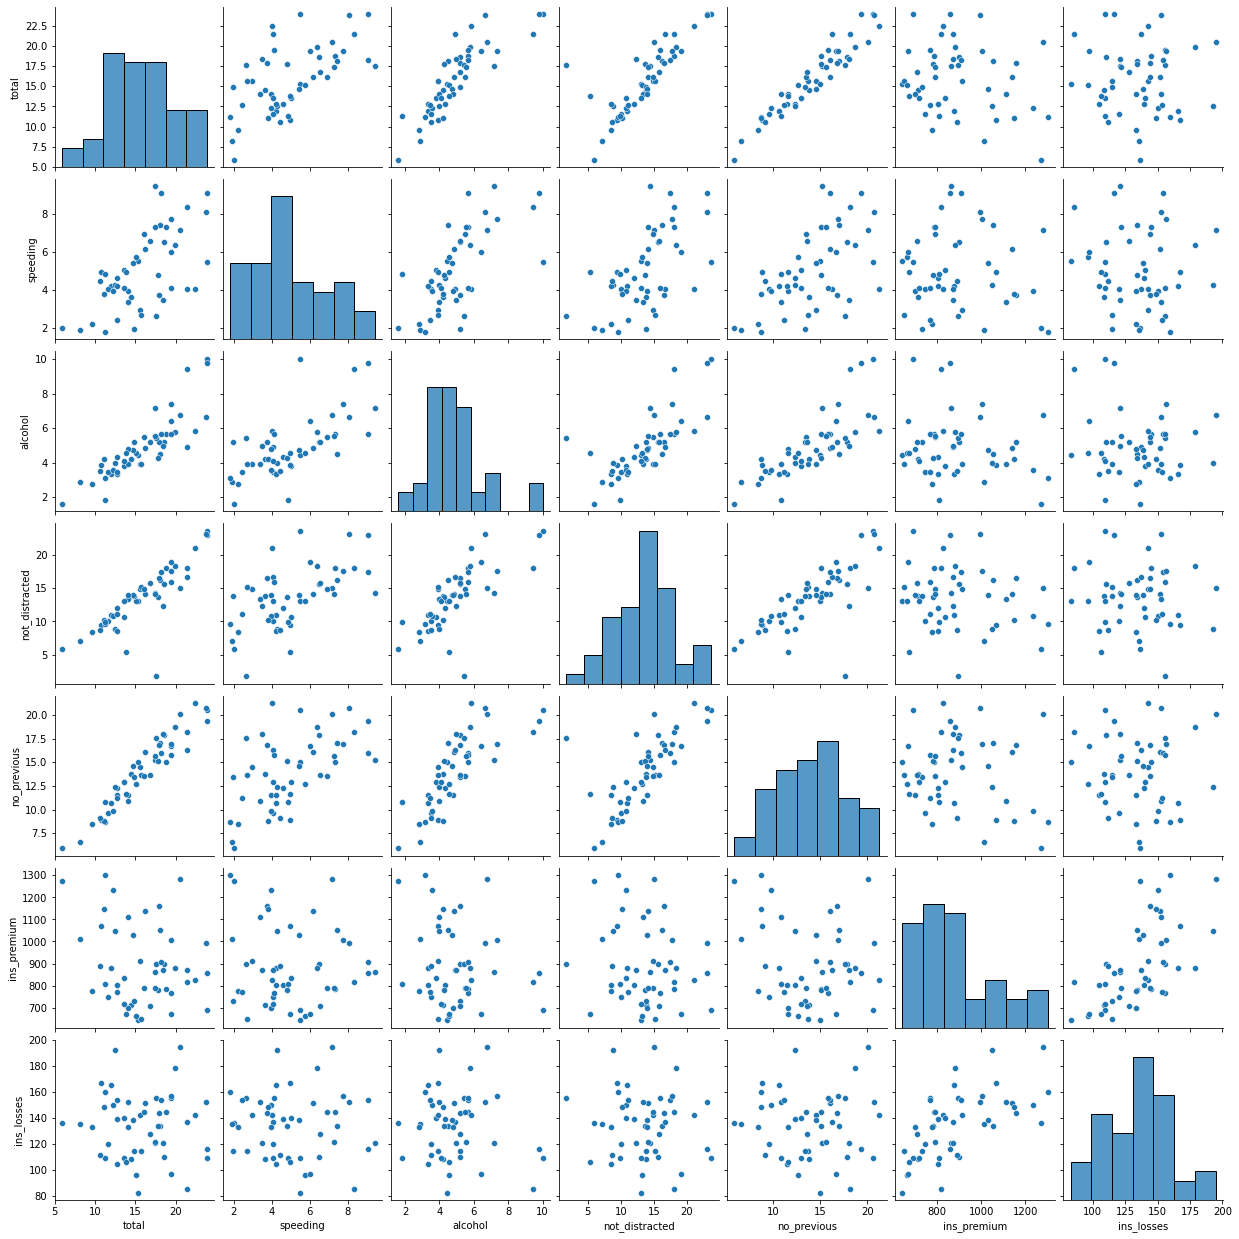

In [54]:
sns.pairplot(df);
# Pairplot ile verilerin birbiri ile korelasyonunu scatter plot olarak görüyoruz.

# **:)##############################(:**


# **Law of Large Numbers**


We can simulate a large number of values for X.

In [55]:
n = 1000000

In [56]:
np.random.seed(51)
die_1 = np.random.randint(1, 7, size=n)
die_1

array([2, 6, 1, ..., 6, 3, 4])

In [57]:
np.random.seed(81) # aynı değerler olmaması için seed değişti
die_2 = np.random.randint(1, 7, size=n)
die_2

array([4, 2, 1, ..., 2, 3, 5])

In [58]:
X = die_1 + die_2

In [59]:
df = pd.DataFrame({"die_1":die_1, "die_2":die_2, "X":X})
df.head(10)

,die_1,die_2,X
0,2,4,6
1,6,2,8
2,1,1,2
3,2,4,6
4,6,4,10
5,1,4,5
6,6,2,8
7,5,2,7
8,2,6,8
9,6,3,9


In [60]:
total_four = df[df.X == 4]
len(total_four)

83599

In [61]:
p = len(total_four) / n # göreceli frekans
p

0.083599

In [62]:
1/12 # teoarik frekans. n ne kadar artarsa p teorik frekansa yakınsar.

0.08333333333333333

In [63]:
freq = df.X.value_counts()
freq

7     166815
6     138767
8     138540
5     110974
9     110934
4      83599
10     83337
11     55840
3      55805
12     27760
2      27629
Name: X, dtype: int64

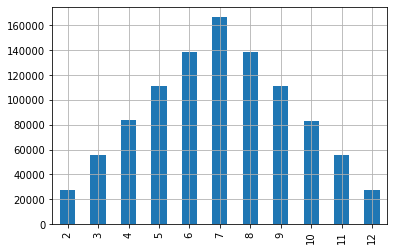

In [64]:
%matplotlib inline
freq.sort_index().plot(kind="bar", grid=True);
# İki zarın toplamının 7 gelme durumu en sık tekrarlanmış.

In [65]:
prop = df.X.value_counts() / n
prop

7     0.166815
6     0.138767
8     0.138540
5     0.110974
9     0.110934
4     0.083599
10    0.083337
11    0.055840
3     0.055805
12    0.027760
2     0.027629
Name: X, dtype: float64

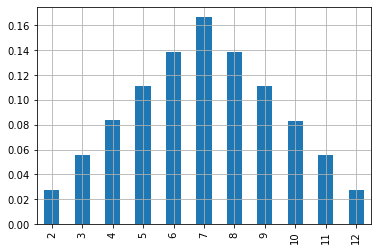

In [66]:
%matplotlib inline
prop.sort_index().plot(kind="bar", grid=True);
# Olasılıksal dağılımlarını görüyoruz. İki zarın toplamanın 7 gelmesinin olasılığı en yüksek.

# **Binomial Distribution**
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 3.40**

The probability that a patient recovers from a stomach disease is 0.8. 

Suppose 20 people are known to have contracted this disease. 

What is the probability that

a. exactly 14 recover?

In [67]:
# 2 tane discrete-ayrık sonucu olan bir trial(deneme) P(X=14)

In [68]:
n = 20
p = 0.8
x = 14

In [69]:
stats.binom.pmf(x,n,p)
# 14 hastanın iyileşme olasılığı %10.9 dur.

0.10909970097305016

In [70]:
stats.binom.mean(n,p)
# beklenen değer, iyileşen hasta sayısı.

16.0

b. at least 10 recover?

this is P(X≥10)=P(10)+P(11)+P(12)+...+P(20)

In [71]:
x = 10

In [72]:
1 - stats.binom.cdf(x-1,n,p)

0.9994365863023398

c. at least 14 but not more than 18 recover?

this is P(14≤X≤18)=P(14)+P(15)+...+P(18)

In [73]:
x1 = 14
x2 = 18

In [74]:
stats.binom.cdf(x2,n,p) - stats.binom.cdf(x1-1,n,p)

0.844132196156189

In [75]:
stats.binom.pmf(14,n,p) + stats.binom.pmf(15,n,p) + stats.binom.pmf(16,n,p) + stats.binom.pmf(17,n,p) + stats.binom.pmf(18,n,p) 

0.8441321961561888

d. at most 16 recover?

this is P(X≤16)=1−P(X>16)=P(17)+P(18)+P(19)+P(20)

In [76]:
x = 16

In [77]:
stats.binom.cdf(x,n,p)

0.5885511380434314

e. Construct discrete probability distribution table and draw a graph

In [78]:
dist = []

for i in range(n+1):
    dist.append(stats.binom.pmf(i,n,p))
    print(str(i)+"\t"+str(stats.binom.pmf(i,n,p)))

0	1.0485759999999954e-14
1	8.388607999999964e-13
2	3.187671039999986e-11
3	7.650410495999971e-10
4	1.3005697843199968e-08
5	1.664729323929596e-07
6	1.664729323929598e-06
7	1.3317834591436782e-05
8	8.656592484433914e-05
9	0.0004616849325031411
10	0.0020314137030138213
11	0.007386958920050267
12	0.02216087676015084
13	0.05454985048652511
14	0.10909970097305016
15	0.17455952155688043
16	0.2181994019461004
17	0.20536414300809458
18	0.13690942867206324
19	0.05764607523034235
20	0.011529215046068483


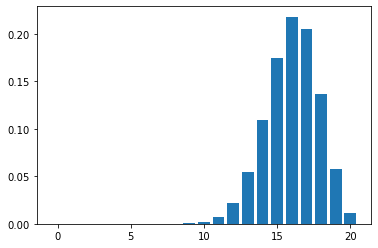

In [79]:
plt.bar(list(range(n+1)), dist)
plt.show;

# **Poisson Distribution**

*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

Suppose that a random system of police patrol is devised so that a patrol officer may visit a given beat location Y = 0, 1, 2, 3, . . . times per half-hour period, with each location being visited an average of once per time period. 

Assume that Y possesses, approximately, a Poisson probability distribution. 

Calculate the probability that the patrol officer will miss a given location during a half-hour period. 

What is the probability that it will be visited once? 

Twice? 

At least once?

In [80]:
# For this example the time period is a half-hour, and the mean number of visits per half-hour interval is λ = 1. Then
mu = 1

P(Y = 0) = ?

In [81]:
stats.poisson.pmf(0, mu)

0.36787944117144233

P(Y = 1) = ?

In [82]:
stats.poisson.pmf(1,mu)

0.36787944117144233

P(Y = 2) = ?

In [83]:
stats.poisson.pmf(2,mu)

0.18393972058572114

P(Y ≥ 1) = ?

In [84]:
1 - stats.poisson.pmf(0,mu)

0.6321205588285577

In [85]:
1 - stats.poisson.cdf(0, mu)

0.6321205588285576

P(Y ≥ 3) = ?

In [86]:
1 - stats.poisson.cdf(2,mu)

0.08030139707139416

# **:)##############################(:**

# **Normal Distribution**
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 4.74**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

a. What is the probability that a person taking the examination scores higher than 72?

this is P(X>72)

In [87]:
mu = 78 # mean
sigma = np.sqrt(36) # standart sapma
x = 72
# ortalaması 78 olan, varyansı 36 olan normal bir dağılım var.
# sigma varyansın karekökü olduğundan sigmayı bulabilirim.
# cdf ile 72'e kadar olan toplamı bulurum sonra 1 den cdf (72) yi çıkartırım.

In [88]:
1 - stats.norm.cdf(x, mu, sigma) # alan hesabı old. için cdf

0.8413447460685429

b. Suppose that students scoring in the top 10% of this distribution are to receive an **A** grade.
What is the minimum score a student must achieve to earn an **A** grade?

In [89]:
# ppf'in cdf'in tersidir yani ppf() fonksiyounun içine cdf(X)'i (X'e kadar olan kümülatif toplam p'yi) koyarsan X değerine ulaşırsın.
#cdf:  x değerini içine alır, ona kadar olan toplam p'yi verir
#ppf:  x değerine kadar olan toplam p'yi içine alır, x değerini verir.

In [90]:
q = 1 - 0.1
q

0.9

In [91]:
stats.norm.ppf(q, mu, sigma)

85.6893093932676

In [92]:
stats.norm.cdf(85.7, mu , sigma)
# cdf'in içine parametre olarak ppf'i elle koyduk (X=85.7 değeri) ve p ye ulaştık

0.9003123403704779

c. What must be the cutoff point for passing the examination if the examiner wants only the
top 28.1% of all scores to be passing?

In [93]:
# Top 28.1 %'e girmek için alman gereken not nedir?

In [94]:
q = 1 - 0.281 
q
# ppf() içine 1- 0.28 kümülatif p değerini koyup buna karşılık gelen X değerini (notu) bulacağım. 

0.719

In [95]:
stats.norm.ppf(q, mu, sigma)
# 81.48 not alırsam top 28.1% lik kısım içine girerim. 

81.47924035456623

d. Approximately what proportion of students have scores 5 or more points above the score
that cuts off the lowest 25%?

In [96]:
# Önce olasılıktan değere giden ppf() i kullanacağız sonra o nota 5 ekleyip bu değerden olasılığa giden cdf'i kullanıp bulduğumuz 
# yüzde değeri 1'den çıkartacağız ki bu nottan fazla not alma olasılığını bulayım.

In [97]:
q1 = 0.25
x1 = stats.norm.ppf(q1, mu, sigma)
x1
# Minimum %25 lik kesime giren not: 73.95

73.95306149882352

In [98]:
1 - stats.norm.cdf(x1 + 5, mu, sigma)
# 78.95 e kadar olan notların olasılığını 1 den çıkararak yüksek değerlerin olasılığını buluruz.

0.43689605516226615

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score exceeds 84?

In [99]:
# Bir öğrencinin notu 72 geciyor ve 84 ü gecme olasılığını soruyor burada cpnditional prop. vardır.
# 72'den fazla not alanların arasında 84'den büyük not alanların olasılığı nedir ?

In [100]:
# P(x > 84) / P(x > 72)

In [101]:
a = 1 - stats.norm.cdf(84, mu, sigma)
a

0.15865525393145707

In [102]:
b = 1 - stats.norm.cdf(72, mu, sigma)
b

0.8413447460685429

In [103]:
a / b

0.18857341734506025

# **t Distribution**
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

In [104]:
# Popülasyonun sigmasını (std) bilmiyorsanız,sample size (n) 30 dan küçükse t dağılımı kullanıyoruz.
# t-distribution normal distribution'a yakın bir görünümdedir ama ufak farklılıkları var.
# t-distribution degrees of freedom (serbestlik derecesine) göre değişir. 
# Elinizdeki her serbestlik derecesinde farlı bir görümüm çıkar

For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

In [105]:
# 15 serbestlik derecesi ile Ortalamadan sağa ve sola kaç standart sapma uzaklaşmam lazım ki ortada kalan alan datanın 90%'ını oluştursun? (veriler bu limitler arasında kalsın)
# Bu durumda soru işareti olan noktaya göre benim kümülatif olasılık değerim 0.95 dir.
# Kümülatif olasılıktan değere gittiğim fonksiyon ppf() idi. önce istediğim noktaya ait kümülatif olasılığı buldum (0.95). 
# Şimdi onu ppf'in içine koyacağım ve karşılık gelen değeri bulacağım.

In [106]:
dof = 15 # serbestlik derecesi, 30 dan küçük sample larda std için t dağılımı kullanılır.
q = 0.95 # %5 -t ----- t ye kadar ki alan %95

In [107]:
stats.t.ppf(q, dof)
# Olasılıktan değere gidiyorum. ppf kullanıyorum, içine de o noktaya ait cdf i koyacağım (0.95'i)

1.7530503556925547

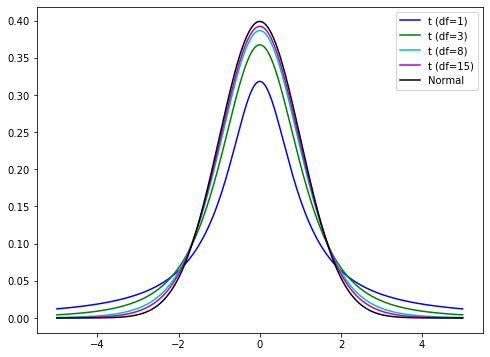

In [108]:
plt.figure(figsize=(8,6))
xs = np.linspace(-5,5,1000)

plt.plot(xs, stats.t.pdf(xs, 1), "b", label="t (df=1)")
plt.plot(xs, stats.t.pdf(xs, 3), "g", label="t (df=3)")
plt.plot(xs, stats.t.pdf(xs, 8), "c", label="t (df=8)")
plt.plot(xs, stats.t.pdf(xs, 15), "m", label="t (df=15)")
plt.plot(xs, stats.norm.pdf(xs), "k", label="Normal")
plt.legend()
plt.show();

# t dağılımı daha basık (spread daha fazla), standard deviation daha büyük.
# serbestlik derecesi daha yüksek olan t dağılımının normal dağılıma daha yakın olduğunu görebiliyorum.


In [109]:
# Yukardaki grafikte serbestlik dereceleri (v) (yani sample size (n)-1) arttıkça grafik normal dağılıma yaklaşıyor. 
# Düşük serbestlik derecelerinde grafik daha basık iken yani standart dağılımı daha fazla iken bu rakam 30'a yaklaştıkça dağılım azalır ve
# normal dağılıma yaklaşır ve v = sonsuz olduğunda ise tam olarak normal dağılıma eşit olur. 
# Serbestlik derecesi 30 dan fazla olan dağılımı artık normal dağılım olarak alabiliriz

In [110]:
# t-dağılımı (örneklem sayısı az olduğu için) standart normal dağılıma göre daha basık, yayılımı daha fazladır. n, örneklem sayısı 30’a yaklaştıkça t dağılımı normal dağılıma benzemeye başlar. 
# Bunun nedeni, sample’ın düşük örneklem sayısıdır. 
# Düşük sayıda örnekleme sahip bir sample da; bir değerin mean’den 1 birim uzakta olmasının dağılıma etkisi ile yüksek sayıda örnekleme sahip bir sampledaki bir değerin mean’den bir birim uzakta olmasının dağılıma etkisi elbette farklı olacaktır.
# Az sayıda örneklem olduğunda her bir observation’ın ağırlığı, kıymeti ve dolayısıyla dağılıma olan etkisi çok sayıdaki örneklem sayısında olduğundan daha fazla olur.
# Standart deviation, dağılımla (variation’la) alakalı bir kavramdır, dağılım ise value’lerin (X’lerin) mean’e (oralamaya) göre ne kadar uzakta olduğu ile ilgilidir. X’ler mean’den ne kadar uzakta ise haliyle bu daha büyük bir dağılıma işaret edecektir.
# Dağılımın fazla olması standart deviation’ın yüksek olması demektir. Burdan hareketle; düşük örneklem sayısına sahip sample’ın standart dağılımı yani yayılımı daha büyük olacaktır. Standart deviation’a “standart eror” denmesinin nedeni de budur. 

# **Confidence Intervals Using the Normal Distribution**

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [111]:
# Normal dağılımı kullanarak güven aralığı hesaplama..

- Güven aralığını ortalamanın üzerine oluşturacaksak önce bir point estimator'u (sample mean) koyuyoruz.

- Sonra buna " - " koyarak işlemi yaptığımızda lower limiti, " + " koyarak işlemi yaptığımızda upper limiti buluyoruz. 

- -/+ dan sonraki kısma "margin of eror" diyoruz yani "hata marjini".

- Hata marjini nasıl hesaplanıyor? : 
- Yüzde kaç güven aralığında hesaplamak istiyorsan ona göre CONFIDENCE MULTIPLIER (Z* ya da Zα/2 ) ile standart hata (sigma/kök n)'yı çarpıyoruz. 
- (Aslında bu sample mean'imizin standart sapması oluyor biz buna kısaca standart eror diyoruz.(burada α (alfa) --> significant level)

- (sample mean'in standart sapması = standart eror = σ / √n)

- Ci'nin lower limiti = sample mean - z* . σ / √n
- Ci'nin upper limiti = sample mean + z* . σ / √n

- Sample size 30 dan büyük ise --> normal dağılım, 
- Sample size 30'dan küçükse --> t dağılımı kullanacağız.

- Popülasyonun standart dağılımını biliyorsan --> normal dağılım kullanabilirsin.
- Standart dağılımı bilmiyorsan --> t dağılımını kullanabilirsin!!

In [112]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

1. Load "tips" dataset from Seaborn library

In [113]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

In [114]:
# Herhangi bir sayı verilmez ise Ci (confidence interval): default olarak 95 tir.
# Bu, alfa'nın (significance level) 0.05 % olması anlamına geliyor (1 - 0.95)
# Barplot için güven aralığımı %95 olarak seçeceğim.

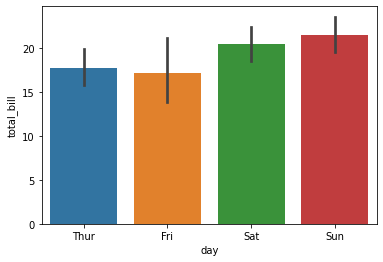

In [115]:
sns.barplot(x = "day", y ="total_bill", data=tips, ci=95)
plt.show()
# burada gruplarayarak bir çizim yaptırmış oldum. 
# bu plot aggregation olarak grupların neyini alıyor? average'ını alıyor. 
# o yüzden benim mean dememe gerek kalmayacak

In [116]:
# Güven aralığını Ci büyütürsem çubukların boyları uzayacaktır. 
# Daha yüksek bir güvenilirlik demek daha büyük bir aralık demek, daha büyük bir aralığı kabul etmek durumundayım. 
# (mean, 95 % olasılıkla 100-150 aralığında ise, tabi ki bunun 90-180 aralığında olma ihtimali daha yüksek olur.)  

3. Subset a dataframe just including Sunday tips

In [117]:
tipsSun = tips[tips["day"]=="Sun"]
tipsSun.head()
# tips datasetinden gün = Pazar olan satırları çekerek yeni bir dataset oluşturdum

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


4. Calculate mean and std

In [118]:
tipsSun["total_bill"].mean()
# pazar günü ortalama fatura miktarı 21.41

21.410000000000004

In [119]:
tipsSun["total_bill"].std()
#  pazar günkü faturaların standart sapması 8.83

8.832121828869889

5. Calculate standart error of the mean

In [120]:
# Bulduğum ortalamanın (21.41) bir güven aralığı var. Zaten biz bunu barplotta da gördüm. Güven aralığını 95% olarak inşa ettim.

# Bu ortalama istatistiğinin bir standart hatası var. O neydi? Sigma / kök(n) ( σ / √n ) 

# n, data frame'imdeki observation sayısı. Bunu len() fonksiyonu ile bulabilirim.


In [121]:
sem = tipsSun["total_bill"].std() / np.sqrt(len(tipsSun))
sem
# sem =  standart error of the mean ( σ / √n )
# benim ortalama (mean) istatistiğime ilişkin standart hata: 
# (standart error of the mean) 1.01 çıktı. 

1.0131138555021968

6. Calculate the margin of error (95%)

In [122]:
# (sem) standart error of the mean ( σ / √n )
# (moe) margin of error  = Confidence multiplier (z*) * standart error of the mean (sem)  -- >    
# moe = z* . σ / √n
# z* (diğer ifadeyle Zα/2 )derken neyi kastediyoruz? 
# İstatistiğimin (burada mean değeridir) etrafında 95% lik bir güven aralığı oluşturmaya çalışıyorum. 
# yani istatistiğim 95% lik alan içinde kalacak ve ben yukardaki şekilde belirtilen x değerine ulaşmaya çalışıyorum. 
# ortasının yüzdesi 0.95 ise geriye 0.5 kalır ki bu, tail'ların her biri 0.025 anlamına gelir.
# yani benim x değerine ulaşabilmem için ppf()'in içinde kullanacağım kümülatif olasılık 0.95+0.025 = 0.975 olacak.

In [123]:
z = stats.norm.ppf(0.975)
z

1.959963984540054

In [124]:
# Margin of erroru formülle hesaplarken direkt 1.96 yı (z*'yı) yazıp standart error of the mean ile çarpacağım.

In [125]:
moe = z * sem
moe

1.9856666690228222

7. Calculate the upper confidence limit

In [126]:
tipsSun["total_bill"].mean() + moe

23.395666669022827

8. Calculate the lower confidence limit

In [127]:
tipsSun["total_bill"].mean() - moe

19.42433333097718

- tipsSun datasetimdeki total_bill'in average'ı üzeride oluşturduğum 95 % güven aralığımı (Ci) 19.42 - 23.4 olarak buldum.

- Bu şu demek: 

- BENİM ELİMDE SAMPLE'LAR VAR VE SAMPLE'DAN POPÜLASYONA GİTMEYE ÇALIŞIYORUM.  
- TÜM PAZAR GÜNLERİNDEKİ ORTALAMA total_bill'i TAHMİN ETMEYE ÇALIŞIYORUM.

- Bir interval, bir aralık tahmini yapıyorum. ne üzerinden? bir nokta tahmini üzerinden, x bar (sample'ın mean'i) üzerinden. 

- Onun etrafında +/- margin of erorlar (hata marjları) var. Hata marjını bulurken z* devreye giriyor (confidence multiplier). onu da tablodan buluyoruz. ci = 95% olduğu için tabloda karşılık gelen z* değerini alıyorum. 

- (95% demek alfa'nın (1-0.95) = 5% olması demek. bu her iki tarafta alfa/2 kadarlık yani 2.5% lik bir alan demek. işte z* değerinden sonraki alan bu 2.5% lik alan oluyor.) ve z*'yı formülde yerine koyunca moe'ya ulaşıyorum.e mean +/- moe formülünden güven aralığını buluyorum.

- Popülasyonun ortalaması yüzde 95 güvenirlikte bu aralıktadır diyorum.. yani popülasyona ilişkin güven aralığı 19.42-23.4 tür. 

- Sonuç olarak:

- TÜM PAZAR GÜNLERİNDEKİ FATURALARIN ORTALAMASI YÜZDE 95 GÜVENİLİRLİKLE 19.42-23.4 ARASINDADIR. 

9. Calculate 95% Confidence Interval around the mean by using scipy.stats

In [128]:
stats.norm.interval(0.95, loc=tipsSun["total_bill"].mean(), scale=sem)
# .interval() metodu kullanacağız. bu metod ile confidence interval ı buluyoruz.

# interval(alpha, loc=0, scale=1) 
# normalde alpha : significance level (1-ci)dir. ama python da alpha yerine direkt ci yi koyuyoruz. ordan kendisi alphayı buluyor.
# loc : ortalama (mean)
# scale : standart error of the mean (ortalamaya ilişkin standart hata) 


(19.42433333097718, 23.395666669022827)

In [129]:
# Güven aralığını küçültürsem, aralık da azalacaktır.
# Çünkü bu, ortalama değeri daha düşük bir olasılıkla tahmin etmem anlamına geliyor.
# Mean'in içinde bulunduğu aralığı geniş tutarsam doğru tahmin etme olasılığım artacak,
# aralık dar olursa doğru tahmin etme olasılığım tabi ki azalacaktır.

### Exercise 8.7 (Large Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

- The shopping times of n = 64 randomly selected customers at a local supermarket were recorded. 

- The average and variance of the 64 shopping times were 33 $minutes$ and 256 $minutes^2$, respectively. 

- Estimate μ, the true average shopping time per customer, with a confidence coefficient of 1 − α = .90.

In [130]:
n = 64
xbar = 33
var = 256
cl = 0.90

s = np.sqrt(var)

sem = s/np.sqrt(n)

In [131]:
sem

2.0

In [132]:
stats.norm.interval(0.90, loc=xbar, scale=sem)
# Ortalamnın üzerine inşa edebileceğim %90 güven aralığını hesaplıyoruz.
# benim gercek ortalamam % 90 ihtimalle bu aralıkta.

(29.710292746097053, 36.28970725390295)

#### Proof


In [133]:
z = stats.norm.ppf(0.95)
z

1.6448536269514722

In [134]:
moe = z * sem
moe # hata payı

3.2897072539029444

In [135]:
low_limit = xbar - moe
low_limit

29.710292746097057

In [136]:
high_limit = xbar + moe
high_limit

36.28970725390295

### Exercise 8.11 (Small Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

A manufacturer of gunpowder has developed a new powder, which was tested in eight shells. The resulting muzzle velocities, in feet per second, were as follows:

3005 2925 2935 2965

2995 3005 2937 2905

Find a 95% confidence interval for the true average velocity μ for shells of this type. Assume that muzzle velocities are approximately normally distributed.

In [137]:
x = [3005, 2925, 2935, 2965, 2995, 3005, 2937, 2905]

In [138]:
n = 8 # sd 7 olan sample kullanacagız.
xbar = np.mean(x) # sample mean
s = np.std(x, ddof=1) # sample standard deviation
# sample std sapması için ddof = 1 olmalı. pop. olasaydı yazmazdık.
cl= 0.95 #confidence level

In [139]:
stats.t.interval(0.95, df=n-1, loc=xbar, scale=s/np.sqrt(n))

(2926.3202426713874, 2991.6797573286126)

In [140]:
2959 - 32.7

2926.3

#### Proof

In [141]:
t = stats.t.ppf(0.975, df=n-1)
t

2.3646242510102993

In [142]:
sem = s/np.sqrt(n)
sem

13.820274961085254

In [143]:
moe = t * sem
moe

32.67975732861261

In [144]:
low_limit = xbar - moe
low_limit

2926.3202426713874

In [145]:
high_limit = xbar + moe
high_limit

2991.6797573286126

# **:)##############################(:**

# **One Sample T Test**


- According to Reynolds Intellectual Ability Scales, the average VIQ (Verbal IQ scores based on the four Wechsler (1981) subtests) is about 109.

- In our sample data, we have a sample of 40 cases. 
- Let's test if the average VIQ of people is significantly bigger than 109.

In [146]:
# Brain size and weight and IQ data (Willerman et al. 1991)
df = pd.read_csv("brain_size.csv", sep=";", na_values = ".", index_col = 0)

In [147]:
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [148]:
# H0: mu = 109
# H1: mu > 109
# Calculate the mean of VIQ
xbar = df.VIQ.mean()
xbar

112.35

In [149]:
# Calculate the std of VIQ
s = df.VIQ.std()
s

23.616107063199735

In [150]:
# Calculate the test statistic
t_test = (xbar - 109)/(s/np.sqrt(df.shape[0]))

In [151]:
#test statistic
t_test # z skorum

0.8971529586323553

In [152]:
# Calculate p-value
1 - stats.t.cdf(t_test, 39)

0.18757115929257173

In [153]:
# Use stats.ttest_1samp() to calculate the test statistic and p-value
oneSamp = stats.ttest_1samp(df.VIQ, 109, alternative="greater")
oneSamp

# default olarak alternative = two sided. bu yüzden biz alternative  = greater yapıyoruz.

# soruda bana ortalama VIQ (significantly)  > 109 ? diye sorduğu için alternative = greater dedik 

Ttest_1sampResult(statistic=0.897152958632355, pvalue=0.1875711592925718)

In [154]:
#Display p-value
oneSamp.pvalue

0.1875711592925718

In [155]:
# Compare p-value and alpha
alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


# **Independent Samples T Test**

## Arsenic Example

- Arsenic concentration in public drinking water supplies is a potential health risk. 
- An article in the Arizona Republic (May 27, 2001) reported drinking water arsenic concentrations in parts per billion (ppb) for 10 metropolitan Phoenix communities and 10 communities in rural Arizona.
- You can find the data in CSV file.

Determine if there is any difference in mean arsenic concentrations between metropolitan Phoenix communities and communities in rural Arizona.

In [156]:
#Import arsenic dataset
arsenic = pd.read_csv("arsenic.csv")

In [157]:
arsenic

,Metro Phoenix,x1,Rural Arizona,x2
0,Phoenix,3,Rimrock,48
1,Chandler,7,Goodyear,44
2,Gilbert,25,New River,40
3,Glendale,10,Apache Junction,38
4,Mesa,15,Buckeye,33
5,Paradise Valley,6,Nogales,21
6,Peoria,12,Black Canyon City,20
7,Scottsdale,25,Sedona,12
8,Tempe,15,Payson,1
9,Sun City,7,Casa Grande,18


In [158]:
#H0: mu1 = mu2
#H1: mu1 != mu2

In [159]:
# Perform Levene test for equal variances
# H0: The population variances are equal
# H1: There is a difference between the variances in the population
# The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(arsenic.x1, arsenic.x2)
leveneTest
# p-value küçük cıktıgı için h0 reddedilemedi

LeveneResult(statistic=7.7015516672169, pvalue=0.012482954069299166)

In [160]:
# average Metro Phoenix
arsenic.x1.mean()

12.5

In [161]:
# average Rural Arizona
arsenic.x2.mean()

27.5

Calculate the T-test for the means of two independent samples of scores.

In [162]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [163]:
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(arsenic.x1, arsenic.x2, equal_var = False) # equal_var = False ortak var.

In [164]:
indTest.statistic

-2.7669395785560558

In [165]:
indTest.pvalue

0.015827284816100885

In [166]:
# Decision
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


In [167]:
# 0.05 anlamlılık seviyesinde yada %95 güven aralığında 2 bölgenin ortalamaları arasında istatistiksel anlamlı bir fark vardır.

In [168]:
stats.t.ppf(0.025, 18)

# t∝/2 nin cdf'i 0.025 olduğundan ppf(0.025) bana t∝/2 değerini verecektir. (-2.1)

# t∝/2'yi t0 değeri ile kıyaslayarak rejected Null veya fail to reject durumunu belirliyorum.

-2.10092204024096

- t∝/2 = -2.1 

- t0 = -2.7669 

- t0 < t∝/2  olduğundan rejected the Null!! ya da pvalue (0.012704) değerim 1-cdf(t∝/2) değeri olan 0.025 ten küçük olduğundan Reject the Null

# **Paired (Dependent) Samples T Test**

## Prozac Data

- Let us consider a simple example of what is often termed "pre/post" data or "pretest/posttest" data. 
- Suppose you wish to test the effect of Prozac on the well-being of depressed individuals, using a standardised "well-being scale" that sums Likert-type items to obtain a score that could range from 0 to 20. 
- Higher scores indicate greater well-being (that is, Prozac is having a positive effect). 
- While there are flaws in this design (e.g., lack of a control group) it will serve as an example of how to analyse such data.

- > Determine if Prozac enhances well-being in depressed individuals. Use   0.05

Soru, prozac'ın hastalar üzerinde olumlu etkisi var mı yok mu? (Ho : ilacı kullanmadan önce ve sonra hastalar üzerinde bir fark oluşmamakta)testimizi difference üzerinde yapacağız.

stats.ttest_rel() fonksiyonunu kullanacağız. fonksiyona ön test ve son test değerlerini giriyoruz.

In [169]:
# read prozac dataset
prozac = pd.read_csv("prozac.csv")

In [170]:
prozac

,moodpre,moodpost,difference
0,3,5,2
1,0,1,1
2,6,5,-1
3,7,7,0
4,4,10,6
5,3,9,6
6,2,7,5
7,1,11,10
8,4,8,4


In [171]:
# H0: d_bar = 0
# H1: d_bar > 0

In [172]:
# Calculate test statistics using stats.ttest_rel()  
# moodpost - moodpre
pairedtest = stats.ttest_rel(prozac.moodpost, prozac.moodpre, alternative="greater")
pairedtest

# datasetimde son testimden ilk testi çıkartılmıştır ama python fonksiyonunda ilk testten son test çıkartılıyor.
# o zaman  alternative = greater değil less demen lazım. buna dikkat et.

Ttest_relResult(statistic=3.1428571428571423, pvalue=0.006872912197394244)

In [173]:
# moodpre - moodpost
# H0: d_bar = 0
# H1: d_bar < 0
stats.ttest_rel(prozac.moodpre, prozac.moodpost, alternative="less")

Ttest_relResult(statistic=-3.1428571428571423, pvalue=0.006872912197394244)

- Dataframe'imde moodpost'tan moodpre çıkartılarak fark bulunmuş.Bu yüzden stats.ttest_rel(prozac["moodpost"], prozac["moodpre"], alternative = "greater") şekilnde pre ile post u yer değiştirerek kullanabilirim veya alternative=less girerim. 

In [174]:
# Decision
alpha = 0.05

if pairedtest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [175]:
# İstatistiksel test sonucu 0.05 anlamlılık seviyesinde prozac tedavisi, depresif hastalarda olumlu sonuc vermiştir.